In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Carregamento e análise dos dados

In [2]:
dados = pd.read_csv('/content/case_Formatura.csv',sep=';')
dados = dados[:5000] # Limitação para processamento

In [3]:
dados['SEMESTRE_DIFF'] = dados['SEMESTRES_CURSADOS'] - dados['DURACAO_CURSO']  # Verificação dos semestres teoricos vs real
dados.loc[dados['SEMESTRE_DIFF'] < 0, 'SEMESTRE_DIFF'] = 0 # Considerando os semestres negativos como zero
dados.head(5)

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,NOME_CURSO,TURNO_CURSO,DURACAO_CURSO,SITUCAO_MATRICULA,DATA_CONCLUSAO,PERIODOS_TRANCADOS,CH_TOTAL_MATRIZ,NR_TOTAL_DISCIPLINAS,CH_APROVADA,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES,SEMESTRE_DIFF
0,1000055,508,316720151A,2,S,1996-11-19 00:00:00,BETIM,MG,32.661-750,3167,CST em Gestão de Recursos Humanos - N,3,4,Formado,2016-12-23 00:00:00,0,1680,27,1680,27,21,8.711111,537.575,1,NaN,NaN,NaN,4,SIM,0
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,CST em Gastronomia - M,0,4,Formado,2016-12-16 00:00:00,0,1700,30,1700,30,21,8.140000,421.000,1,NaN,NaN,NaN,4,NAO,0
2,1000179,1,80820151A,2,S,1950-06-29 23:00:00,CUIABÁ,MT,78.065-900,808,CST em Gastronomia - M,0,4,Formado,2016-12-30 00:00:00,0,1700,30,1700,30,67,8.510000,NaN,0,NaN,NaN,NaN,4,NAO,0
3,1000210,1,80820151A,2,C,1981-11-23 23:00:00,POCONÉ,MT,78.175-000,808,CST em Gastronomia - M,0,4,Formado,2016-12-30 00:00:00,0,1700,30,1700,30,36,8.456667,NaN,0,NaN,NaN,NaN,4,SIM,0
4,1000228,6,52220112A,1,S,1979-12-29 23:00:00,SALVADOR,BA,41.250-470,522,Administração - N,3,8,Formado,2015-06-29 23:00:00,0,2970,50,2970,50,37,7.624490,NaN,0,43.0,48.0,5.0,14,NAO,6


In [4]:
dados.shape

(5000, 30)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COD_ALUNO             5000 non-null   int64  
 1   COD_UNIDADE           5000 non-null   int64  
 2   COD_TURMA             5000 non-null   object 
 3   SEXO                  5000 non-null   int64  
 4   ESTADO_CIVIL          5000 non-null   object 
 5   DATA_NASCIMENTO       5000 non-null   object 
 6   CIDADE_ALUNO          5000 non-null   object 
 7   UF_ALUNO              5000 non-null   object 
 8   CEP_ALUNO             5000 non-null   object 
 9   COD_CURSO             5000 non-null   int64  
 10  NOME_CURSO            5000 non-null   object 
 11  TURNO_CURSO           5000 non-null   int64  
 12  DURACAO_CURSO         5000 non-null   int64  
 13  SITUCAO_MATRICULA     5000 non-null   object 
 14  DATA_CONCLUSAO        5000 non-null   object 
 15  PERIODOS_TRANCADOS   

In [6]:
dados.corr()

,COD_ALUNO,COD_UNIDADE,SEXO,COD_CURSO,TURNO_CURSO,DURACAO_CURSO,PERIODOS_TRANCADOS,CH_TOTAL_MATRIZ,NR_TOTAL_DISCIPLINAS,CH_APROVADA,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,SEMESTRE_DIFF
COD_ALUNO,1.000000,-0.109009,-0.017893,-0.360135,0.157473,-0.446676,-0.065009,-0.378636,-0.403375,-0.378843,-0.403036,0.145194,0.130688,0.009544,0.191554,-0.050927,-0.020145,0.042727,0.026144,0.411570
COD_UNIDADE,-0.109009,1.000000,-0.021311,0.868730,0.270002,-0.220666,-0.167079,-0.339828,-0.190548,-0.339312,-0.190021,-0.204279,0.028877,0.072195,0.103824,-0.243980,-0.320471,-0.317757,-0.338371,-0.294534
SEXO,-0.017893,-0.021311,1.000000,-0.005298,-0.047804,-0.051092,-0.018611,-0.017789,-0.063505,-0.018483,-0.064334,-0.037593,0.093279,-0.188019,0.025622,-0.072462,-0.093167,-0.089676,-0.089127,-0.083260
COD_CURSO,-0.360135,0.868730,-0.005298,1.000000,0.219800,-0.044382,-0.130546,-0.195734,-0.021915,-0.195649,-0.022198,-0.214225,-0.020338,0.055264,0.017156,-0.181644,-0.260199,-0.286974,-0.264707,-0.338077
TURNO_CURSO,0.157473,0.270002,-0.047804,0.219800,1.000000,-0.205871,-0.046258,-0.313986,-0.179012,-0.314232,-0.179518,0.021594,0.033227,-0.029537,0.107716,-0.020195,-0.071455,-0.131110,-0.106130,0.022221
DURACAO_CURSO,-0.446676,-0.220666,-0.051092,-0.044382,-0.205871,1.000000,0.110536,0.843136,0.927126,0.842250,0.925432,-0.011240,-0.271139,0.057428,-0.283902,0.408339,0.429584,0.282731,0.719508,0.181805
PERIODOS_TRANCADOS,-0.065009,-0.167079,-0.018611,-0.130546,-0.046258,0.110536,1.000000,0.069953,0.108349,0.069446,0.107617,0.076601,-0.072126,0.000602,-0.073324,0.084363,0.130959,0.156872,0.229100,0.231905
CH_TOTAL_MATRIZ,-0.378636,-0.339828,-0.017789,-0.195734,-0.313986,0.843136,0.069953,1.000000,0.730211,0.999170,0.729238,0.007228,-0.248496,0.034974,-0.273043,0.182880,0.231516,0.217888,0.602513,0.147105
NR_TOTAL_DISCIPLINAS,-0.403375,-0.190548,-0.063505,-0.021915,-0.179012,0.927126,0.108349,0.730211,1.000000,0.729519,0.998195,-0.005449,-0.254227,0.046650,-0.301340,0.406660,0.433195,0.294115,0.695581,0.208385
CH_APROVADA,-0.378843,-0.339312,-0.018483,-0.195649,-0.314232,0.842250,0.069446,0.999170,0.729519,1.000000,0.730957,0.006699,-0.246794,0.034404,-0.272469,0.182509,0.230775,0.216812,0.600071,0.144389


#Modificação dos dados nan para 0
Como NOTA_ENEM não entrou no modelo, então pude zerar os outros parâmetro

In [7]:
dados.fillna(0, inplace=True)
dados.head(5)

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,NOME_CURSO,TURNO_CURSO,DURACAO_CURSO,SITUCAO_MATRICULA,DATA_CONCLUSAO,PERIODOS_TRANCADOS,CH_TOTAL_MATRIZ,NR_TOTAL_DISCIPLINAS,CH_APROVADA,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES,SEMESTRE_DIFF
0,1000055,508,316720151A,2,S,1996-11-19 00:00:00,BETIM,MG,32.661-750,3167,CST em Gestão de Recursos Humanos - N,3,4,Formado,2016-12-23 00:00:00,0,1680,27,1680,27,21,8.711111,537.575,1,0.0,0.0,0.0,4,SIM,0
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,CST em Gastronomia - M,0,4,Formado,2016-12-16 00:00:00,0,1700,30,1700,30,21,8.140000,421.000,1,0.0,0.0,0.0,4,NAO,0
2,1000179,1,80820151A,2,S,1950-06-29 23:00:00,CUIABÁ,MT,78.065-900,808,CST em Gastronomia - M,0,4,Formado,2016-12-30 00:00:00,0,1700,30,1700,30,67,8.510000,0.000,0,0.0,0.0,0.0,4,NAO,0
3,1000210,1,80820151A,2,C,1981-11-23 23:00:00,POCONÉ,MT,78.175-000,808,CST em Gastronomia - M,0,4,Formado,2016-12-30 00:00:00,0,1700,30,1700,30,36,8.456667,0.000,0,0.0,0.0,0.0,4,SIM,0
4,1000228,6,52220112A,1,S,1979-12-29 23:00:00,SALVADOR,BA,41.250-470,522,Administração - N,3,8,Formado,2015-06-29 23:00:00,0,2970,50,2970,50,37,7.624490,0.000,0,43.0,48.0,5.0,14,NAO,6


#Formatando dados para treino e normalizando eles

In [8]:
# Seleção das colunas que apresentaram uma correlação maior com SEMESTRE_DIFF
X = dados[
    [
        'DURACAO_CURSO',
        'PERIODOS_TRANCADOS',
        'NOTA',
        'NRO_TOTAL_REPRO',
        'NRO_REPRO_NORMAL',
        'NRO_REPRO_ACO',
        'TURNO_CURSO',
        'COD_CURSO'
    ]
].values
print(X)

[[4.00000000e+00 0.00000000e+00 8.71111111e+00 ... 0.00000000e+00
  3.00000000e+00 3.16700000e+03]
 [4.00000000e+00 0.00000000e+00 8.14000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.91710000e+04]
 [4.00000000e+00 0.00000000e+00 8.51000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.08000000e+02]
 ...
 [5.00000000e+00 0.00000000e+00 8.13684210e+00 ... 3.00000000e+00
  3.00000000e+00 9.91740000e+04]
 [4.00000000e+00 0.00000000e+00 7.86333333e+00 ... 0.00000000e+00
  3.00000000e+00 9.91890000e+04]
 [8.00000000e+00 0.00000000e+00 7.52615385e+00 ... 2.90000000e+01
  3.00000000e+00 9.92090000e+04]]


In [9]:
y = dados[ 'SEMESTRE_DIFF'].values

In [10]:
X = X/np.amax(X,axis=0)
print(X, len(X))

[[0.33333333 0.         0.91180461 ... 0.         1.         0.03188137]
 [0.33333333 0.         0.85202559 ... 0.         0.         0.99832892]
 [0.33333333 0.         0.89075402 ... 0.         0.         0.00813393]
 ...
 [0.41666667 0.         0.85169504 ... 0.03191489 1.         0.99835912]
 [0.33333333 0.         0.82306649 ... 0.         1.         0.99851012]
 [0.66666667 0.         0.78777342 ... 0.30851064 1.         0.99871146]] 5000


In [11]:
ymax=np.amax(y)
y = y/ymax
print(y, len (y))

[0.         0.         0.         ... 0.04166667 0.         0.08333333] 5000


#Criando as funções de ativação

In [12]:
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))

def relu(Soma):
    return np.maximum(0,Soma)

#Arquitetura da Rede
Ela é composta de uma camada de entrada com 8 entradas, mais quatro camadas ocultas e uma saida, essa arquitetura tem a ideia de expandir as entradas e fazer a redução para uma unica saida

In [13]:
arquitetura = [
    {"dim_entrada": 8, "dim_saida": 100, "ativacao": "relu"},
    {"dim_entrada": 100, "dim_saida": 1000, "ativacao": "relu"},
    {"dim_entrada": 1000, "dim_saida": 100, "ativacao": "relu"},    
    {"dim_entrada": 100, "dim_saida": 200, "ativacao": "relu"},
    {"dim_entrada": 200, "dim_saida": 1, "ativacao": "sigmoid"}    
]

#Funções para iniciar as camadas e veriicar ativação, podem retornar o custo ou não
O seed é para manter o teste controlado, para que não haja problemas com corte de dados diferentes

In [14]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

In [15]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [16]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

In [17]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [18]:
y_estimado[0,0]*ymax

10.99763082128874

In [19]:
y[0]*ymax

0.0

#Retropropagação para melhoria da rede

In [20]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

In [21]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

In [22]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [23]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [24]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

#Função para definir o treino

In [25]:
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 100 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

#Split dos dados para treino e teste

In [26]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

#Treino

In [27]:
# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 500, 0.01)

Iteração: 00000 - custo: 0.50291 
Iteração: 00100 - custo: 0.26546 
Iteração: 00200 - custo: 0.26282 
Iteração: 00300 - custo: 0.26092 
Iteração: 00400 - custo: 0.25913 


#Gráfico de treinamento

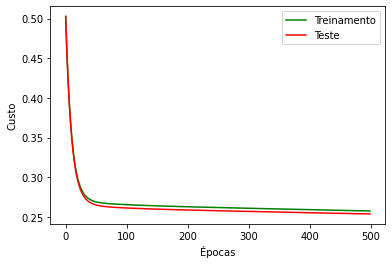

In [28]:
plt.plot(historia_custo,'g')
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

# Previsão

In [29]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

#Gráfico de previsão
É possivel notar que o modelo não respondeu bem para eventos extremos

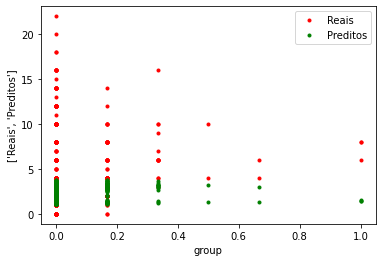

In [30]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.r')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.g')
plt.legend(['Reais','Preditos'])
plt.ylabel(['Reais','Preditos'])
plt.xlabel('group')
plt.show()

#Agregação dos resultados e ajustes

In [31]:
prev = []
real = []
for i in ymax*Y_pred.reshape([-1,1]):
    prev.append(i[0])
for i in ymax*y_teste:
    real.append(i)

In [32]:
df_test = pd.DataFrame({
    'real':real,
    'prev':prev
})
adjust_prev = df_test[df_test['real']==0]['prev'].mean()
adjust_prev

1.4988014976610073

In [33]:
#Ajuste de valores zero, o modelo superestimou o valor de zero
df_test.loc[df_test['prev']<adjust_prev,'prev']=0.0
df_test = df_test.round(0)
df_test

,real,prev
0,4.0,2.0
1,0.0,0.0
2,0.0,0.0
3,2.0,0.0
4,0.0,2.0
...,...,...
2145,4.0,3.0
2146,2.0,2.0
2147,0.0,3.0
2148,1.0,0.0


In [34]:
accuracy_score(df_test['real'],df_test['prev'])

0.4702325581395349

In [38]:
df_test.loc[df_test['real']>0,'real_binary']=1.0
df_test.loc[df_test['prev']>0,'prev_binary']=1.0
df_test.loc[df_test['real']<=0,'real_binary']=0.0
df_test.loc[df_test['prev']<=0,'prev_binary']=0.0
accuracy_score(df_test['real_binary'],df_test['prev_binary'])

0.752093023255814

In [39]:
print(f'A acurácia do modelo pra definir o numero de semestres foi de {round(accuracy_score(df_test["real"],df_test["prev"]),4)*100}%, para verificar se o aluno vai ou não se formar com atraso foi de {round(accuracy_score(df_test["real_binary"],df_test["prev_binary"]),4)*100}%.')

A acurácia do modelo pra definir o numero de semestres foi de 47.02%, para verificar se o aluno vai ou não se formar com atraso foi de 75.21%.
